In [26]:
from random import uniform
import numpy as np
import math
from matplotlib import pyplot as plt


def radtran(xini,yini,zini,nphotons,zmax,nbins):
    phiarray = []
    thetaarray = []
    xarray = []
    yarray = []
    zarray = []
    for i in range(nphotons):
        x,y,z = xini, yini, zini                      #initialize photon position
        #phi_i = 2*math.pi*uniform(0,1)              # define phi in the range 0 to 2pi
        #r = 1.
        #x = r*math.cos(phi_i)
        #y = r*math.sin(phi_i)
        z = zini
        #n              = 2.7e19                         # number density of particles
        #sigma          = 0.625e-24                        # ~ cross section of an atom 
        taumax         = zmax# *n*sigma                # constant density slab, vertical optical depth
        while z >= 0 and z <= zmax:
            eta = uniform(0,1)                        # optical depth: random number between 0,1
            # Isotropic Scattering
            phi = 2*math.pi*uniform(0,1)              # define phi in the range 0 to 2pi
            mu  = 2*uniform(0,1) -1                   # mu in range -1,1            
            #Rayleigh Scattering (need to hashtag the others)
            rand = uniform(0,1)
            #mu = (2*rand+(1+4*rand**2)**(1/2))**(1/3) - (2*rand+(1+4*rand**2)**(1/2))**(-1/3)
            
            theta = math.acos(mu)
            
            tau = -np.log(1-eta)                      # random optical depth
            L = tau * zmax/taumax                     # length traveled by photon
            
            x = x + L * math.sin(theta)*math.cos(phi) # update x,y,z
            y = y + L * math.sin(theta)*math.sin(phi)
            z = z + L * math.cos(theta)
            
                
            if (z > zmax) and 0 <= theta <= math.pi/2:
                phiarray.append(phi)
                thetaarray.append(theta)
                xarray.append(x)
                yarray.append(y)
                zarray.append(z)
                break
                 
            elif z < 0:
                break
            else:
                continue
                
    
    photons_counted = len(thetaarray)
    photons_missed = nphotons - photons_counted
    # solve for normalized intensity
    mu_array = np.histogram(thetaarray, bins = nbins)
    outgoing_energy = np.array(mu_array[0]/nphotons)
    mid_bin = np.zeros(nbins-1)
    intensity = np.zeros(nbins-1)
    n_theta = np.zeros(nbins-1)
    for i in range(nbins-1):
        left = mu_array[1][i]
        right = mu_array[1][i+1]
        mid_bin[i] = np.mean([left,right])
        n_theta[i] = mu_array[0][i]
        intensity[i] = .5*nbins*np.divide(outgoing_energy[i],mid_bin[i])
        
    mid_bin = mid_bin*180./math.pi
    mid_bin_u = np.cos(mid_bin)
    error = np.divide(intensity,np.sqrt(n_theta))
    plt.plot(mid_bin,n_theta)
    plt.show()
    plt.errorbar(mid_bin,intensity, error, label = '{}/{} photons counted'.format(photons_counted,nphotons),ecolor='red',marker='o')
    #plt.xlim(0,90)
    plt.xlabel('$\phi$')
    plt.ylabel('Normalized Intensity')
    plt.title('Plane Parallel Slab')
    plt.legend()
    
    plt.show()
    #plt.savefig('intensity_curve_nphotons_{}_nbins_{}_zmax={}'.format(nphotons,nbins,zmax))
    
    # create an image
    #ximage = zarray*np.sin(thetaarray) - yarray*np.cos(thetaarray)*np.sin(phiarray)-xarray*np.cos(thetaarray)*np.cos(phiarray)
    #yimage = yarray*np.cos(phiarray) - xarray*np.cos(phiarray)
    #ximage = xarray*np.cos(phiarray)
    #yimage = yarray*np.sin(phiarray)
    ximage = xarray#*np.sin(phiarray)*np.cos(thetaarray)
    yimage = yarray#*np.sin(phiarray)*np.cos(thetaarray)
    h =plt.hist2d(ximage, yimage, bins = nbins)
    plt.colorbar(h[3])
    #plt.xlim(-max(ximage),max(ximage))
    #plt.ylim(-max(yimage),max(yimage))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plane Parallel Slab: x, y = {}, {}, nbins = {}'.format(xini,yini,nbins))
    
    plt.show()
    #plt.savefig('image_nphotons_{}_nbins_{}_zmax_{}'.format(nphotons,nbins,zmax))
    
    return 
            

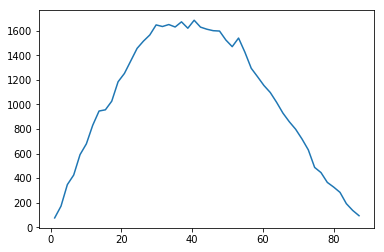

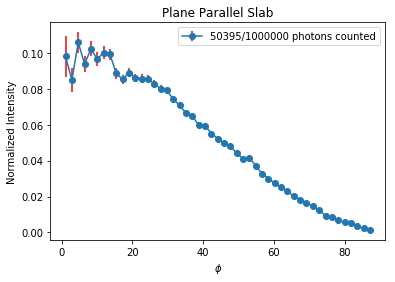

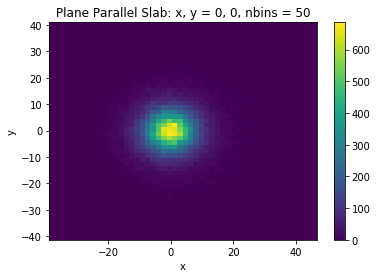

CPU times: user 2min 37s, sys: 4.81 s, total: 2min 42s
Wall time: 3min 31s


In [27]:
%%time

# set the 
nphotons = 1000000
nbins    = 50
zmax = 10
xinitial = 0
yinitial = 0
zinitial = 0

radtran(xinitial,yinitial,zinitial, nphotons,zmax,nbins)





In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

phi = []
r = []
z = [] 
# define the patch locations around the planet (higher levels)
def init_patch_pos(disk_in,disk_extent,patches_per_cube,m_zoom,center_cube,level):    
                           
    for iphi in range(1,patches_per_cube[0]):
        for ir in range(1,patches_per_cube[1]):
            for iz in range(1,patches_per_cube[2]):

                #patch_size = patch_min_size*m_zoom**(n_levels-level)
                patch_size = np.divide((disk_extent-disk_in),patches_per_cube)
                patch_pos = center_cube + np.multiply((np.array([iz,ir,iphi])-np.floor((patches_per_cube)/2.)),patch_size)
                print('with patch positions = ',patch_pos)
                phi.append(patch_pos[2])
                r.append(patch_pos[1])
                z.append(patch_pos[0])
    
    return [z,r,iphi]


def init_rubiks(disk_in,disk_extent,n_rubiks, rplanet, patch_min_size, patches_per_cube, m_zoom, n_levels):
    
    planet_position = np.array([0.,rplanet,0.])
    largest_cube_size = np.multiply(patch_min_size,patches_per_cube)*m_zoom**(n_levels-1)
    print('largest_cube_size not const =', largest_cube_size)
    largest_cube_size[2] = 2*np.pi/n_rubiks[2]
    print('largest_cube_size not const =', largest_cube_size)
    
    for phicube in range(0,n_rubiks[2]): 
        for rcube in range(0,n_rubiks[1]):
            for zcube in range(0,n_rubiks[0]):
                #center_rubiks = planet_position + np.multiply((np.array([zcube,rcube,phicube])-np.floor(n_rubiks/2)),largest_cube_size)
                center_rubiks = planet_position + np.multiply(np.divide(disk_extent-disk_in,n_rubiks),np.array([zcube+1,rcube+1,phicube+1])-np.array([0.5,0.5,0.5]))
                print('Generating a cube at (z,r,phi) = ',center_rubiks, 'with size =', largest_cube_size)
                
                # define locations of all cubes in the annulus:
                init_patch_pos(disk_in,disk_extent,patches_per_cube, m_zoom, center_rubiks, 1)
                break
                # define locations of cubes around planet
    for level in range(2,n_levels): 
        init_patch_pos(disk_in,disk_extent,patches_per_cube, m_zoom, planet_position, level) 
        print('Generating a cube at (z,r,phi) = ',planet_position, 'with size =', largest_cube_size)
        break
    return 



# annulus parameters
n_rubiks = np.array([3,3,3])
print(n_rubiks[1])
disk_extent = np.array([0.,15.,2*np.pi])
disk_inner = np.array([0.,.1, 0.])
# cube parameters
patch_min_size = np.array([.1,0.1665,0.1745])
patches_per_cube = np.array([3,3,3])
m_zoom = 3
n_levels = 5 # number of levels that the rubiks cube is surrounding the planet                      
                
init_rubiks(disk_inner, disk_extent,n_rubiks, 2., patch_min_size ,patches_per_cube ,m_zoom ,n_levels)  
plt.scatter(r,phi)
plt.xlabel('r')
plt.ylabel('$\phi$')
#plt.xlim = (-5,100)
#plt.ylim(0,2*np.pi)
plt.show()

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
onearray = np.array([1.,1.,1.]) 
n_rubiks = np.array([1,5,5])
print('number of cubes (z,r,phi):', n_rubiks )
patches_per_cube = np.array([3,3,3])
m_zoom = 3
n_levels = 5
patch_min_size = [0.01,0.01,0.01]
patch_min_size[2] = 2.*np.pi/(np.multiply(patches_per_cube[2]*(m_zoom**(n_levels-1)),n_rubiks[2]))
print('smallest patch extent (z,r,phi) =',patch_min_size)
 # number of levels that the rubiks cube is surrounding the planet   
planet_position = np.array([0.,1.,0.])
largest_cube_size = np.multiply(patch_min_size,patches_per_cube)*m_zoom**(n_levels-1)
print('Each cube has an phi extant = ', largest_cube_size[2])
phi_extent = largest_cube_size[2]*n_rubiks[2]
print('Giving a total extent of: =', largest_cube_size*n_rubiks)

    
phi = []
r = []
z = []

for phicube in range(0,n_rubiks[2]-1): 
    for rcube in range(0,n_rubiks[1]-1):
        for zcube in range(0,n_rubiks[0]-1):
            center_rubiks = planet_position + np.multiply((np.array([zcube,rcube,phicube])-np.floor(n_rubiks/2)),largest_cube_size)
            #center_rubiks = planet_position + np.multiply(np.divide(disk_extent-disk_in,n_rubiks),np.array([zcube,rcube,phicube])-np.array([0.5,0.5,0.5]))
            print('Generating a cube at (z,r,phi) = ',center_rubiks, 'with size =', largest_cube_size)
            
                                   
            for iphi in range(0,patches_per_cube[2]):
                for ir in range(0,patches_per_cube[1]):
                    for iz in range(0,patches_per_cube[0]):

                        patch_size = patch_min_size*m_zoom**(n_levels-1)
                        print(patch_size)
                        patch_pos = center_rubiks + np.multiply((np.array([iz,ir,iphi])-np.floor(patches_per_cube)/2.),patch_size)
                        print('with patch positions = ',patch_pos)
                        phi.append(math.atan(patch_pos[2]/patch_pos[1]))
                        r.append(patch_pos[1])
                        z.append(patch_pos[0])
                        
         


plt.scatter(r,phi,s=.1)
plt.xlabel('r')
plt.ylabel('$\phi$')
for iphi in range(0,patches_per_cube[2]):
    for ir in range(0,patches_per_cube[1]):
        for iz in range(0,patches_per_cube[0]):
            for level in range(1,n_levels):
                print(patch_min_size)
                patch_size = patch_min_size*m_zoom**(n_levels-level)
                print(patch_size)
                patch_pos = planet_position + np.multiply((np.array([iz,ir,iphi])-np.floor((patches_per_cube)/2.)),patch_size)
                print('with patch positions (planet) = ',patch_pos)
                phi.append(math.atan(patch_pos[2]/patch_pos[1]))
                r.append(patch_pos[1])
                z.append(patch_pos[0])
plt.scatter(r,phi,s=.1)
plt.xlabel('r')
plt.ylabel('$\phi$')
plt.show()


number of cubes (z,r,phi): [1 5 5]
smallest patch extent (z,r,phi) = [0.01, 0.01, 0.00517134593183505]
Each cube has an phi extant =  1.256637061435917
Giving a total extent of: = [ 2.43       12.15        6.28318531]
[0.01, 0.01, 0.00517134593183505]
[0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.00517134593183505, 0.01, 0.01, 0.0051713

ValueError: operands could not be broadcast together with shapes (3,) (243,) 

In [ ]:
np.arcsin(4/2)

In [ ]:
from math import pi, cos, sin
from netgen.geom2d import SplineGeometry
geo = SplineGeometry()
pnums = [ r,phi]
l1 = geo.Append(["line", 0, 1], leftdomain=1, rightdomain=0, bc="upperRight")
l2 = geo.Append(["line", 1, 2], leftdomain=1, rightdomain=0, bc="upperCenter")
l3 = geo.Append(["line", 2, 3], leftdomain=1, rightdomain=0, bc="upperLeft")
geo.Append(["line", 0, 5], leftdomain=0, rightdomain=1, bc="lowerRight", copy = l3)
geo.Append(["line", 5, 4], leftdomain=0, rightdomain=1, bc="lowerCenter", copy = l2)
geo.Append(["line", 4, 3], leftdomain=0, rightdomain=1, bc="lowerLeft", copy = l1)
ngmesh = geo.GenerateMesh(maxh=0.1)

In [ ]:
from ngsolve import *

# viscosity
nu = 0.001

# timestepping parameters
tau = 0.01
tend = 10

from netgen.geom2d import SplineGeometry
geo = SplineGeometry()
geo.AddRectangle( (0, 0), (2, 0.41), bcs = ("wall", "outlet", "wall", "inlet"))
geo.AddCircle ( (0.2, 0.2), r=0.05, leftdomain=0, rightdomain=1, bc="cyl", maxh=0.02)
mesh = Mesh( geo.GenerateMesh(maxh=0.07))

mesh.Curve(3)

V = VectorH1(mesh,order=3, dirichlet="wall|cyl|inlet")
Q = H1(mesh,order=2)

X = FESpace([V,Q])

u,p = X.TrialFunction()
v,q = X.TestFunction()

stokes = nu*InnerProduct(grad(u), grad(v))+div(u)*q+div(v)*p - 1e-10*p*q
a = BilinearForm(X)
a += stokes*dx
a.Assemble()

# nothing here ...
f = LinearForm(X)   
f.Assemble()

# gridfunction for the solution
gfu = GridFunction(X)

# parabolic inflow at inlet:
uin = CoefficientFunction( (1.5*4*y*(0.41-y)/(0.41*0.41), 0) )
gfu.components[0].Set(uin, definedon=mesh.Boundaries("inlet"))

# solve Stokes problem for initial conditions:
inv_stokes = a.mat.Inverse(X.FreeDofs())

res = f.vec.CreateVector()
res.data = f.vec - a.mat*gfu.vec
gfu.vec.data += inv_stokes * res


# matrix for implicit Euler 
mstar = BilinearForm(X)
mstar += SymbolicBFI(u*v + tau*stokes)
mstar.Assemble()
inv = mstar.mat.Inverse(X.FreeDofs(), inverse="sparsecholesky")

# the non-linear term 
conv = BilinearForm(X, nonassemble = True)
conv += (grad(u) * u) * v * dx

# for visualization
Draw (Norm(gfu.components[0]), mesh, "velocity", sd=3)

# implicit Euler/explicit Euler splitting method:
t = 0
with TaskManager():
    while t < tend:
        print ("t=", t, end="\r")

        conv.Apply (gfu.vec, res)
        res.data += a.mat*gfu.vec
        gfu.vec.data -= tau * inv * res    

        t = t + tau
        Redraw()